Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [8]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


По графику видна обратная взаимосвязь, чем больше жесткость воды, тем меньше смертность.

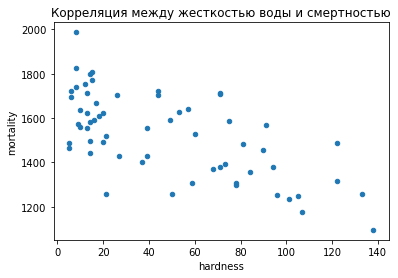

In [101]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция между жесткостью воды и смертностью')
plt.show()

In [12]:
#рассчет коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [13]:
#рассчет коэф. корреляции Спирмeна
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X = df[['hardness']]
y = df['mortality']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [81]:
X_train.shape

(51, 1)

In [82]:
y_train.shape

(51,)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
model.coef_

array([-3.28204413])

In [85]:
model.intercept_

1681.6276209577732

In [86]:
y_pred = model.predict(X_test)
y_pred

array([1337.01298764, 1648.80717969, 1635.67900318, 1537.21767938,
       1425.62817906, 1615.98673842, 1245.11575209, 1435.47431145,
       1612.70469429, 1661.9353562 ])

In [87]:
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1337.012988,1247
5,10,1648.807180,1558
46,14,1635.679003,1495
31,44,1537.217679,1702
13,78,1425.628179,1307
55,20,1615.986738,1625
34,133,1245.115752,1259
49,75,1435.474311,1587
12,21,1612.704694,1519
40,6,1661.935356,1696


In [90]:
#рассчитываем коэффициент детерминации
model.score(X_test, y_test)

0.583655258547394

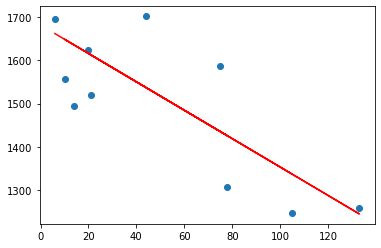

In [91]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

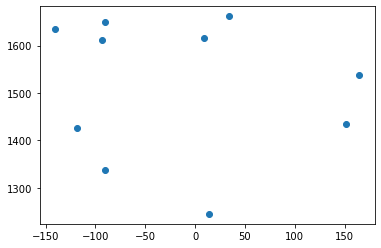

In [92]:
#Выводим график остатков
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)
plt.show()

<AxesSubplot:xlabel='mortality', ylabel='Count'>

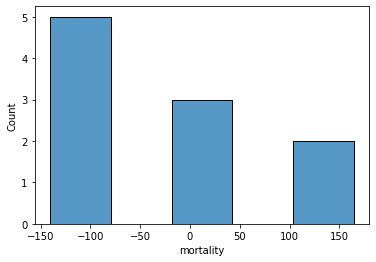

In [100]:
#Данных слишком мало для постороения нормального распределения
sns.histplot(residuals)

Коэф. детерминации не высокий, вывод взаимосвязь между смертностью и жесткостью воды есть, но не очень сильная, очевидно, что есть и другие параметры влияющие на смертность.

Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [107]:
df_north = df[df['location']=='North']
df_south = df[df['location']=='South']

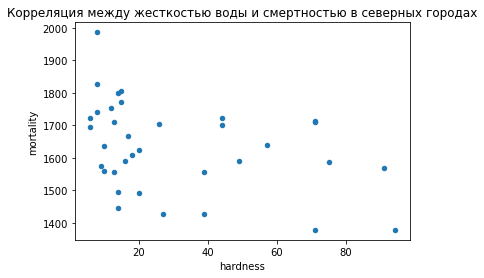

In [111]:
df_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция между жесткостью воды и смертностью в северных городах')
plt.show()

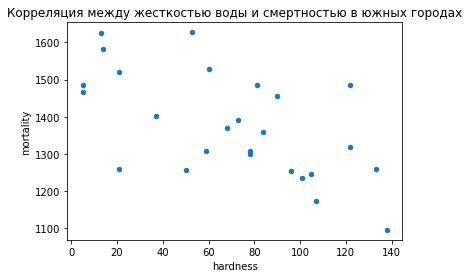

In [110]:
df_south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Корреляция между жесткостью воды и смертностью в южных городах')
plt.show()

По отдельности, взаимосвязь смертности и жесткости воды прослеживается хуже.

In [112]:
#рассчет коэф. корреляции Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [113]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [114]:
#рассчет коэф. корреляции Спирмeна
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [115]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Рассчет для северных городов

In [135]:
X = df_north[['hardness']]
y = df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape
y_train.shape
model_north = LinearRegression()
model_north.fit(X_train, y_train)
model_north.coef_
model_north.intercept_
y_pred_north = model_north.predict(X_test)
y_pred_north

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [136]:
res_df_north = X_test.copy()

res_df_north['y_pred_north'] = y_pred_north
res_df_north['y_test'] = y_test
res_df_north

,hardness,y_pred_north,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591
50,71,1547.793009,1713
31,44,1601.168290,1702
22,8,1672.335331,1742
16,39,1611.052601,1555
28,15,1658.497295,1772


In [137]:
#рассчитываем коэффициент детерминации
model_north.score(X_test, y_test)

0.018885304285745863

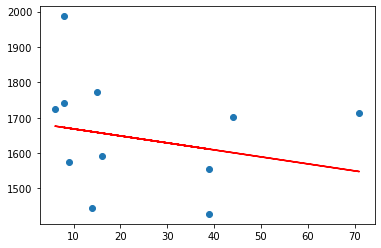

In [138]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_north, c='r')

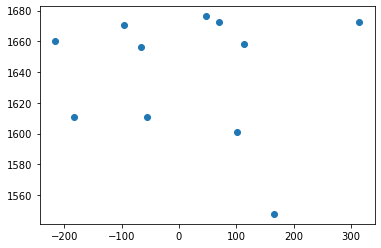

In [139]:
#Выводим график остатков
residuals = y_test - y_pred_north
plt.scatter(residuals, y_pred_north)
plt.show()

Рассчет для южных городов

In [171]:
X = df_south[['hardness']]
y = df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60, random_state = 42)
X_train.shape
y_train.shape
model_south = LinearRegression()
model_south.fit(X_train, y_train)
model_south.coef_
model_south.intercept_
y_pred_south = model_south.predict(X_test)
y_pred_south

array([1234.79856316, 1558.08373578, 1281.77162243, 1234.79856316,
       1469.66385951, 1513.87379765, 1408.87519457, 1558.08373578,
       1425.45392137, 1513.87379765, 1356.37589304, 1533.21564558,
       1276.24538016, 1339.79716623, 1370.1914987 , 1535.97876671])

In [172]:
res_df_south = X_test.copy()

res_df_south['y_pred_south'] = y_pred_south
res_df_south['y_test'] = y_test
res_df_south

,hardness,y_pred_south,y_test
18,122,1234.798563,1318
38,5,1558.083736,1486
0,105,1281.771622,1247
58,122,1234.798563,1486
27,37,1469.663860,1402
19,21,1513.873798,1260
33,59,1408.875195,1309
2,5,1558.083736,1466
57,53,1425.453921,1627
12,21,1513.873798,1519


In [173]:
#рассчитываем коэффициент детерминации
model_south.score(X_test, y_test)

0.20262224827494235

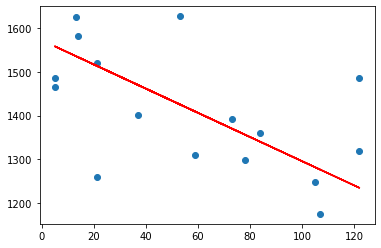

In [174]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_south, c='r')

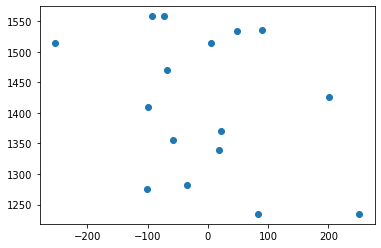

In [175]:
#Выводим график остатков
residuals = y_test - y_pred_south
plt.scatter(residuals, y_pred_south)
plt.show()

Вывод: взглянув на данные полученные по двум группам, мы видим, что зависимостью это назвать проблематично. Исходя из этого, можно сделать вывод, что первый взгляд на обобщенные данные был ошибочным. Смертность, если и зависит от жесткости воды, то не сильно, очевидно, что существуют более важные показатели.